<a href="https://colab.research.google.com/github/shleppich/zxc/blob/main/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [1]:
!pip install pandas
!pip install seaborn

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [8]:
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


Категориальная-famsize(Y)
Числовая- age(X)

In [12]:
describe = df['famsize'].describe()
print(describe)

count     395
unique      2
top       GT3
freq      281
Name: famsize, dtype: object


In [13]:

agg = df.groupby(['famsize']).agg({'age': ['mean', 'median', 'min', 'max', np.std, pd.Series.mode]})
print(agg)

              age                                   
             mean median min max       std      mode
famsize                                             
GT3      16.66548   17.0  15  22  1.299114        16
LE3      16.77193   17.0  15  20  1.219568  [17, 18]


In [14]:

q1 = df.groupby(['famsize'])['age'].quantile(0.25)
print(q1)

famsize
GT3    16.0
LE3    16.0
Name: age, dtype: float64


In [15]:

q2 = df.groupby(['famsize'])['age'].quantile(0.5)
print(q2)

famsize
GT3    17.0
LE3    17.0
Name: age, dtype: float64


In [46]:

q3 = df.groupby(['famsize'])['age'].quantile(0.75)
print(q3)

famsize
GT3    18.0
LE3    18.0
Name: age, dtype: float64


In [47]:
iqr = q3 - q1
print(iqr)

famsize
GT3    2.0
LE3    2.0
Name: age, dtype: float64


Какие выводы можно сделать исходя из полученных статистических данных?

Выводы:
1.  Среднее в обеих группах примерно равно
2.  Медианные данные  у обеих групп равны
3. Разность между первым и третьим квартилями равна 2



##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

гистограмма переменной (X) относительно категориального признака (Y)

In [17]:
import plotly.express as plt


In [18]:
fig = plt.histogram(x = df['age'], y = df['famsize'])
fig.show()

 boxplot числовой переменной

In [20]:

fig = plt.box(df, y='age')
fig.show()

 boxplot числовой переменной относительно категориальный переменной

In [22]:
fig = plt.box(df, x = 'famsize', y = 'age')
fig.show()

диаграмма рассеивания для числовых признаков

In [28]:

fig = plt.scatter(df, x = 'absences', y = 'age',color='famsize')
fig.show()

матрица корреляции для двух числовых признаков

<Axes: >

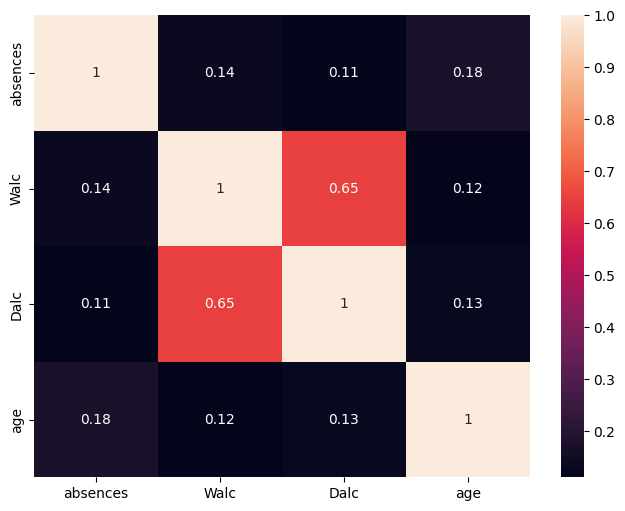

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df[['absences', 'Walc', 'Dalc','age']].corr()
#fig = plt.imshow(corr_matrix)
#fig.show()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)


Какие выводы можно сделать на основе графиков и матрицы корреляции?

На основе графиков и матрицы корреляции можно сделать вывод, что существует некая корреляция между Dalc и Walc.Зависимости между возрастом и прогулами практически нет.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

In [ ]:
"""

Ваш код здесь

"""

### Пример реализации одного метода

In [ ]:
from statistics import median, mean

class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outline_by_mean(self, column_name):
    mean_data = mean(self.df[column_name])
    maximum = mean_data * 2
    result = []

    for item in self.df[column_name]:
      if abs(item - mean_data) < maximum:
        result.append(item)

    return result



In [ ]:
data = pd.DataFrame(
    data = {
        "col1": [1, 2, 3, 4, 5, 1000],
        "col2": [1, 2, 3, 2, 1, 4]
    }
)

so = Outline(data)
so.delete_outline_by_mean("col1")

[1, 2, 3, 4, 5]